In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os

In [6]:
file_path = 'data/MatDX_EF_cleaned.csv'
data = pd.read_csv(file_path)

# 마지막 두 열 출력
print(data.iloc[:, -2:])

      formation_energy_value  formation_energy_value_per_atom
0                   1.017402                         0.101740
1                   2.975885                         0.495981
2                   1.888520                         0.472130
3                   1.022825                         0.511413
4                   6.236779                         0.215061
...                      ...                              ...
4977               -0.186508                        -0.046627
4978                4.803874                         0.200161
4979               -4.940262                        -1.235066
4980               -1.094989                        -0.182498
4981                3.716576                         0.929144

[4982 rows x 2 columns]


Formation energy value column summary statistics:
count    4982.000000
mean        0.644576
std         4.537441
min      -158.547974
25%        -0.432661
50%         0.377385
75%         1.665336
max        35.741949
Name: formation_energy_value, dtype: float64

Formation energy valeu per atom column summary statistics:
count    4982.000000
mean        0.140175
std         0.550452
min        -4.954624
25%        -0.096020
50%         0.082411
75%         0.337180
max         4.816694
Name: formation_energy_value_per_atom, dtype: float64


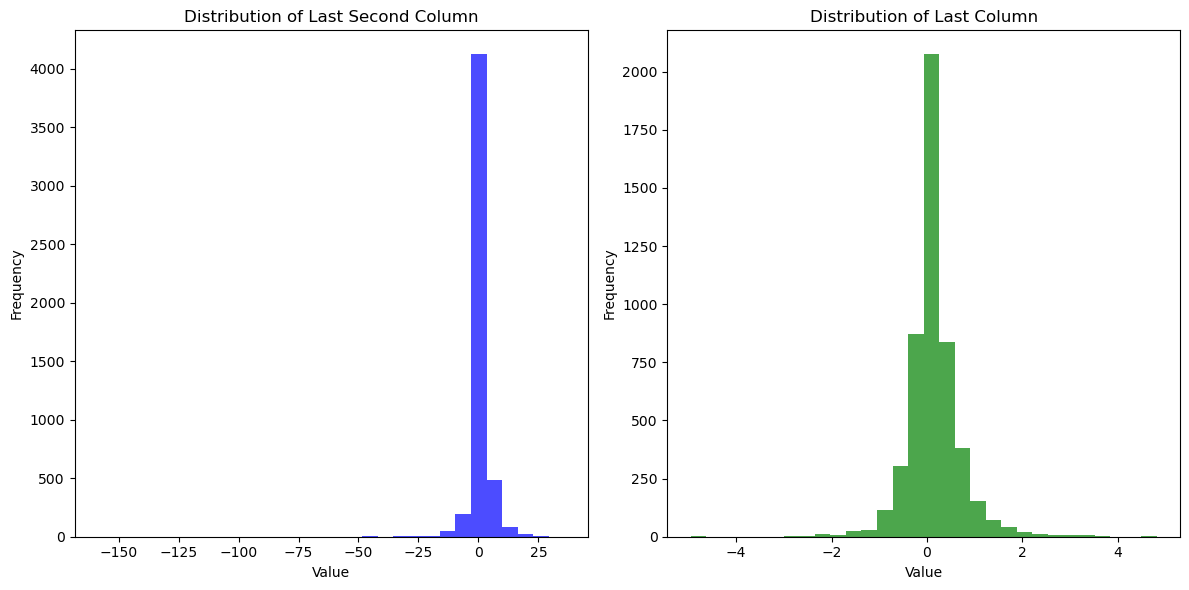

In [7]:
# 각 열에 대한 요약 통계 출력
print("Formation energy value column summary statistics:")
print(data.iloc[:, -2].describe())

print("\nFormation energy valeu per atom column summary statistics:")
print(data.iloc[:, -1].describe())

# 각 열의 히스토그램 출력
plt.figure(figsize=(12, 6))

# 마지막에서 두 번째 열 히스토그램
plt.subplot(1, 2, 1)
plt.hist(data.iloc[:, -2], bins=30, alpha=0.7, color='blue', label='Last second column')
plt.title('Distribution of Last Second Column')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 마지막 열 히스토그램
plt.subplot(1, 2, 2)
plt.hist(data.iloc[:, -1], bins=30, alpha=0.7, color='green', label='Last column')
plt.title('Distribution of Last Column')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [8]:
scaler_1 = StandardScaler()
scaler_2 = StandardScaler()

data['Standardized_formation_energy_value'] = scaler_1.fit_transform(data.iloc[:, -2].values.reshape(-1, 1))
data['Standardized_formation_energy_value_per_atom'] = scaler_2.fit_transform(data.iloc[:, -2].values.reshape(-1, 1))
print(data)

      original_index  formula space_group  \
0                  0   Ni4Ta6        R-3c   
1                  1   Mn4Sb2    I4_1/amd   
2                  2   Ir2Na2        Imma   
3                  3     MoSm        R-3m   
4                  4  Sn17P12       I-43m   
...              ...      ...         ...   
4977            4977    Ag3Br      P4/mmm   
4978            4978  Al16Ge8       Fd-3m   
4979            4979   Pt2Th2        Cmcm   
4980            4980    Ga5Sr        Cmmm   
4981            4981    MoSr3        Pmm2   

                                              structure  \
0     [{'data': {'a': [-6.910143e-10, 0, 0], 'b': [3...   
1     [{'data': {'a': [-1.87778212e-10, 1.87604249e-...   
2     [{'data': {'a': [-1.36776653e-10, 2.60817299e-...   
3     [{'data': {'a': [1.65820251e-10, 9.57363439999...   
4     [{'data': {'a': [-5.563178910000001e-10, 5.563...   
...                                                 ...   
4977  [{'data': {'a': [3.54083755e-10, 0, 0], 

In [9]:
# 새로운 파일로 저장
output_path = 'data/MatDX_EF_cleaned_Std.csv'
data.to_csv(output_path, index=False)